In [1]:
# References:
# User Guide - Merge, join, and concatenate: https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
# Data Schools top pandas tricks: https://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/top_25_pandas_tricks.ipynb
# Matplotlib basics: https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = 'C:\\Users\\hksingh\\Documents\\AIDeepDive\\'

In [64]:
df1 = pd.read_csv(path+'SPTSXComposite.csv', index_col='Ticker')
print(df1.shape)
df1.head()

(132, 5)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples


In [65]:
df2 = pd.read_csv(path+'SPTSXCap_Employees.csv')
df2.head()

,Ticker,Name,MarketCapitalization,NumberEmployees
0,NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
1,TSX:AC,Air Canada (TSX:AC),11338.6,32600.0
2,TSX:AGI,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0
3,TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0
4,TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0


In [66]:
print(df2.shape)

(142, 4)


In [67]:
# Drop columns, rows, duplicates

In [68]:
df2.duplicated()[:5]

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [69]:
df2.loc[df2.duplicated()]

,Ticker,Name,MarketCapitalization,NumberEmployees
132,TSX:ACB,Aurora Cannabis Inc. (TSX:ACB),8958.5,967.0
133,TSX:BTO,B2Gold Corp. (TSX:BTO),4105.6,3168.0
134,NasdaqGS:OTEX,Open Text Corporation (NasdaqGS:OTEX),14905.9,13100.0
135,TSX:PAAS,Pan American Silver Corp. (TSX:PAAS),3565.0,4530.0
136,TSX:PXT,Parex Resources Inc. (TSX:PXT),3129.7,279.0
137,TSX:TSGI,The Stars Group Inc. (TSX:TSGI),6113.9,4516.0
138,TSX:TD,The Toronto-Dominion Bank (TSX:TD),139949.9,87999.0
139,TSX:EMA,Emera Incorporated (TSX:EMA),12873.1,7523.0
140,TSX:EMP.A,Empire Company Limited (TSX:EMP.A),9112.5,123000.0
141,TSX:GOOS,Canada Goose Holdings Inc. (TSX:GOOS),6254.2,3932.0


In [70]:
df2 = df2.drop_duplicates(keep='first')
print(df2.shape)

(132, 4)


In [71]:
#### Exercise ###
# 1. Determine the current index labels for both dataframes
print(df1.index)

Index(['NYSE:AEM', 'TSX:AC', 'TSX:AGI', 'TSX:AQN', 'TSX:ATD.B', 'TSX:AP.UN',
       'TSX:ALA', 'TSX:ACO.X', 'TSX:ACB', 'TSX:BTO',
       ...
       'TSX:TIH', 'TSX:TOU', 'TSX:RNW', 'TSX:VET', 'NYSE:WCN', 'TSX:WFT',
       'TSX:WJA', 'TSX:WPM', 'TSX:WSP', 'TSX:YRI'],
      dtype='object', name='Ticker', length=132)


In [72]:
print(df2.index)

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            122, 123, 124, 125, 126, 127, 128, 129, 130, 131],
           dtype='int64', length=132)


In [73]:
# 2. Set the indices to 'Ticker', if not already



### End of Exercise ###

In [74]:
df2=df2.set_index('Ticker')
print(df2.index)

Index(['NYSE:AEM', 'TSX:AC', 'TSX:AGI', 'TSX:AQN', 'TSX:ATD.B', 'TSX:AP.UN',
       'TSX:ALA', 'TSX:ACO.X', 'TSX:ACB', 'TSX:BTO',
       ...
       'TSX:TIH', 'TSX:TOU', 'TSX:RNW', 'TSX:VET', 'NYSE:WCN', 'TSX:WFT',
       'TSX:WJA', 'TSX:WPM', 'TSX:WSP', 'TSX:YRI'],
      dtype='object', name='Ticker', length=132)


In [75]:
# Merging - SQL like
df3 = pd.merge(df1,df2, on='Ticker', how='left')
print(df3.shape)
df3.head(3)

# Note automatix suffix

(132, 8)


,Name_x,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Name_y,MarketCapitalization,NumberEmployees
Ticker,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,Air Canada (TSX:AC),11338.6,32600.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0


In [76]:
# Join - very similar to merge but "on" defaults to index
df3 = df1.join(df2, how='left', rsuffix='2') # Suffix must be supplied if columns of the same name exist in both
print(df3.shape)
df3.head()

(132, 8)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,Name2,MarketCapitalization,NumberEmployees
Ticker,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,Agnico Eagle Mines Limited (NYSE:AEM),15892.5,5990.0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,Air Canada (TSX:AC),11338.6,32600.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,Alamos Gold Inc. (TSX:AGI),3151.9,1700.0
TSX:AQN,Algonquin Power & Utilities Corp. (TSX:AQN),12811.6,2247.9,2.0,Utilities,Algonquin Power & Utilities Corp. (TSX:AQN),8000.0,2277.0
TSX:ATD.B,Alimentation Couche-Tard Inc. (TSX:ATD.B),30426.3,79562.8,3.0,Consumer Staples,Alimentation Couche-Tard Inc. (TSX:ATD.B),47281.4,133000.0


In [77]:
# Creating slices
lil_df1 = df1.sample(3, random_state=22)
lil_df2 = df1.sample(1, random_state=22)
# lil_df2 = df2.sample(4, random_state=22)
lil_df1

,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),27483.2,7309.8,3.0,Consumer Discretionary
TSX:YRI,Yamana Gold Inc. (TSX:YRI),10933.9,2454.1,5.0,Materials


In [78]:
# Concatenating
big_df = pd.concat([lil_df1, lil_df2],sort=False) 
print(big_df.shape)
print()
big_df

(4, 5)



,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector
Ticker,,,,,
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials
NYSE:QSR,Restaurant Brands International Inc. (NYSE:QSR),27483.2,7309.8,3.0,Consumer Discretionary
TSX:YRI,Yamana Gold Inc. (TSX:YRI),10933.9,2454.1,5.0,Materials
TSX:TD,The Toronto-Dominion Bank (TSX:TD),1334903.0,36354.0,3.0,Financials


In [79]:
# Exercise:
# 1. Remove the column "Name"  from df2 (hint: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
df2=df2.drop(columns=['Name'])
df2.head()

,MarketCapitalization,NumberEmployees
Ticker,,
NYSE:AEM,15892.5,5990.0
TSX:AC,11338.6,32600.0
TSX:AGI,3151.9,1700.0
TSX:AQN,8000.0,2277.0
TSX:ATD.B,47281.4,133000.0


In [80]:
# 2. Verify that all of the indices in df1 are in df2
print((df1.index == df2.index).all())

True


In [81]:
print (((df1.index).isin(df2.index)).all())

True


In [82]:
# 4. Combine df1 and df2 into one dataframe 
df3 = pd.merge(df1,df2, on='Ticker', how='left')
print(df3.shape)
df3.head(3)

(132, 7)


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector,MarketCapitalization,NumberEmployees
Ticker,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,Materials,15892.5,5990.0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,Industrials,11338.6,32600.0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,Materials,3151.9,1700.0


In [83]:
# 5. Check for NaN values anywhere in the dataframe (df.isna.any())
df3.isna().any()

### End of Exercise ###

Name                    False
TotalAssets             False
TotalRevenue            False
GeographicSegments       True
PrimarySector           False
MarketCapitalization    False
NumberEmployees          True
dtype: bool

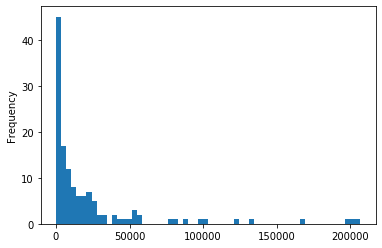

In [84]:
# Plotting
df2.NumberEmployees.plot.hist(bins=60)

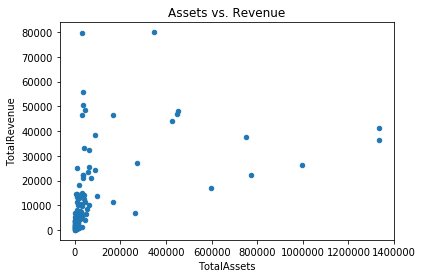

In [85]:
df1.plot.scatter('TotalAssets', 'TotalRevenue')
plt.title('Assets vs. Revenue') # interfaces with matplotlib
plt.show()

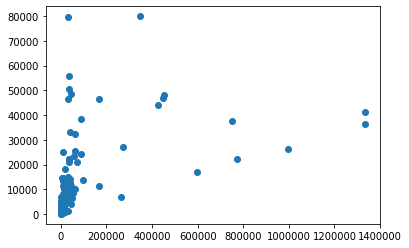

In [86]:
plt.scatter(df1.TotalAssets, df1.TotalRevenue)



In [87]:
# Correlation matrix
df1.corr()

,TotalAssets,TotalRevenue,GeographicSegments
TotalAssets,1.000000,0.46042,-0.022675
TotalRevenue,0.460420,1.00000,0.092280
GeographicSegments,-0.022675,0.09228,1.000000


In [88]:
# Handy tricks

In [89]:
# Create dummy variables
dummy_df = pd.get_dummies(df1,columns=['PrimarySector'])
print(dummy_df.columns)
dummy_df.head(3)

Index(['Name', 'TotalAssets', 'TotalRevenue', 'GeographicSegments',
       'PrimarySector_Communication Services',
       'PrimarySector_Consumer Discretionary',
       'PrimarySector_Consumer Staples', 'PrimarySector_Energy',
       'PrimarySector_Financials', 'PrimarySector_Health Care',
       'PrimarySector_Industrials', 'PrimarySector_Information Technology',
       'PrimarySector_Materials', 'PrimarySector_Real Estate',
       'PrimarySector_Utilities'],
      dtype='object')


,Name,TotalAssets,TotalRevenue,GeographicSegments,PrimarySector_Communication Services,PrimarySector_Consumer Discretionary,PrimarySector_Consumer Staples,PrimarySector_Energy,PrimarySector_Financials,PrimarySector_Health Care,PrimarySector_Industrials,PrimarySector_Information Technology,PrimarySector_Materials,PrimarySector_Real Estate,PrimarySector_Utilities
Ticker,,,,,,,,,,,,,,,
NYSE:AEM,Agnico Eagle Mines Limited (NYSE:AEM),10715.5,2990.0,5.0,0,0,0,0,0,0,0,0,1,0,0
TSX:AC,Air Canada (TSX:AC),19197.0,18065.0,5.0,0,0,0,0,0,0,1,0,0,0,0
TSX:AGI,Alamos Gold Inc. (TSX:AGI),4455.5,889.4,4.0,0,0,0,0,0,0,0,0,1,0,0


In [90]:
# Create bins
df1['RevenueLevels']=pd.cut(df1.TotalRevenue,3, labels=['Low', 'Medium', 'High'])
print(df1.loc[df1.RevenueLevels=='High'].sample(3))

                                                   Name  TotalAssets  \
Ticker                                                                 
TSX:ATD.B     Alimentation Couche-Tard Inc. (TSX:ATD.B)      30426.3   
TSX:BAM.A  Brookfield Asset Management Inc. (TSX:BAM.A)     349705.7   
TSX:MG                Magna International Inc. (TSX:MG)      35403.0   

           TotalRevenue  GeographicSegments           PrimarySector  \
Ticker                                                                
TSX:ATD.B       79562.8                 3.0        Consumer Staples   
TSX:BAM.A       79975.7                 9.0              Financials   
TSX:MG          55710.1                20.0  Consumer Discretionary   

          RevenueLevels  
Ticker                   
TSX:ATD.B          High  
TSX:BAM.A          High  
TSX:MG             High  


In [91]:
df1.TotalRevenue.nsmallest(3)

Ticker
TSX:CRON     15.7
TSX:ACB      55.2
TSX:WEED    226.3
Name: TotalRevenue, dtype: float64

In [92]:
# Complex conditions 
rbc = df2.loc['TSX:RY']
print(rbc)

bigger_than_rbc = df2.loc[(df2.MarketCapitalization>rbc.MarketCapitalization) | (df2.NumberEmployees>rbc.NumberEmployees)]
bigger_than_rbc

MarketCapitalization    149713.5
NumberEmployees          82197.0
Name: TSX:RY, dtype: float64


,MarketCapitalization,NumberEmployees
Ticker,,
TSX:ATD.B,47281.4,133000.0
TSX:BAM.A,61229.8,101700.0
TSX:EMP.A,9112.5,123000.0
TSX:WN,15523.3,203238.0
TSX:L,24652.0,200000.0
TSX:MG,19736.3,168000.0
TSX:ONEX,8135.8,207000.0
TSX:BNS,85329.1,99678.0
TSX:TD,139949.9,87999.0


In [ ]:
# Create a new variable based on conditions
df1['International']=np.where(df1.GeographicSegments>3, True, False) 
# Alternative ways of acheiving this same task: https://datatofish.com/if-condition-in-pandas-dataframe/

df1[['Name','GeographicSegments', 'International']].sample(10)

In [ ]:
### Exercise ###
# 1. Plot the distribution of GeographicSegments
    # Comment on what you see
    # Add a title
    


In [ ]:
# 2 How many companies have both larger market capitalization AND more employees than RBC?

